In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from TrainTestSplit import trainTestSplit
from sklearn.naive_bayes import GaussianNB

'------------------------------------------------- Initial Setup -------------------------------------------------'

%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

np.set_printoptions(precision = 2)

# Set the random seed to a specific value (e.g., 42)
np.random.seed(42)

#grid means grid search will be done, joblib means it will load a model
grid_p = 'grid'


In [46]:
## Loading in the data of Set A.
XTrain, XTest, YTrain, YTest = trainTestSplit("B")

In [47]:
## Setting the classifier to be Vanilla Linear SVM.
Classifier = SVC(kernel = 'linear')

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print("Cross Validation Score : ", np.mean(crossValidationScores))

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print("Training Accuracy : ", Classifier.score(XTrain, YTrain))

print ("Testing Accuracy : ", Classifier.score(XTest, YTest))

Cross Validation Score :  0.5348881442631442
Training Accuracy :  0.5348903446311593
Testing Accuracy :  0.578125


In [48]:
parameters = { 'C' : [1, 2],
               'gamma' : [0.01, 0.02]
              }

if grid_p == 'joblib':
    Clf = joblib.load('./GridSearchObjects/LSVMSetB.pkl')
elif grid_p == 'grid':
    Clf = GridSearchCV(Classifier, parameters, n_jobs = 5, verbose = 4, scoring = 'accuracy')


In [49]:
## ## Fitting the Model to the Training Data.
Clf.fit(XTrain, YTrain.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=5,
             param_grid={'C': [1, 2], 'gamma': [0.01, 0.02]},
             scoring='accuracy', verbose=4)

In [50]:
if grid_p == 'grid':
    ## Printing the statistics after hyper-parameter tuning.
    print (Clf.best_score_)
    print (Clf.best_estimator_)

0.5351740404371984
SVC(C=1, gamma=0.01, kernel='linear')


In [51]:
## Setting the classifier to be the hyperparameter tuned Linear SVM.
if grid_p == 'grid':
    Classifier = Clf.best_estimator_
elif grid_p == 'joblib':
    Classifier = Clf
    
## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print ("Cross Validation Score : ", np.mean(crossValidationScores))

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print ("Training Accuracy : ", Classifier.score(XTrain, YTrain))
print ("Testing Accuracy : ", Classifier.score(XTest, YTest))

Cross Validation Score :  0.5348881442631442
Training Accuracy :  0.5348903446311593
Testing Accuracy :  0.578125


In [52]:
## Using Recursive Feature Elimination for performing feature selection.
Rfe = RFE(Classifier, n_features_to_select = 1, step = 1)
Rfe.fit(XTrain,YTrain)
Rankings = Rfe.ranking_

## Creating a list of features .
Features = list(XTrain.columns.values)

## Creating a dictionary to map the variable name to their RFE rankings .
RFERanks = {}

for i in range(0,len(Features)):
    
     RFERanks[Features[i]] = Rankings[i]
        
RFERanks = OrderedDict(sorted(RFERanks.items(), reverse = False, key = lambda t: t[1]))
print(RFERanks)

OrderedDict([('GD', 1), ('Form', 2), ('WeightedStreak', 3), ('STKPP', 4), ('Streak', 5), ('GKPP', 6), ('Midfield', 7), ('CKPP', 8), ('Overall', 9), ('Defense', 10), ('Attack', 11)])


In [53]:
## Remove the less relevant features and only keep the top ones.
removeFeatures = []
print(RFERanks)
for key, value in RFERanks.items():
    if (value >= 15):
        removeFeatures.append(key)


XTrain.drop(removeFeatures, axis = 1, inplace = True)
XTest.drop(removeFeatures, axis = 1, inplace = True)

OrderedDict([('GD', 1), ('Form', 2), ('WeightedStreak', 3), ('STKPP', 4), ('Streak', 5), ('GKPP', 6), ('Midfield', 7), ('CKPP', 8), ('Overall', 9), ('Defense', 10), ('Attack', 11)])


In [54]:
parameters = { 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
              }

if grid_p == 'joblib':
    Clf = joblib.load('./GridSearchObjects/LSVMSetB.pkl')
elif grid_p == 'grid':
    Clf = GridSearchCV(Classifier, parameters, n_jobs = 5, verbose = 4, scoring = 'accuracy')

In [55]:
Clf.fit(XTrain, YTrain.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
if grid_p == 'grid':
    ## Printing the statistics after hyper-parameter tuning.
    print (Clf.best_score_)
    print (Clf.best_estimator_)

0.5351740404371984
SVC(C=1, gamma=0.01, kernel='linear')


In [ ]:
## Setting the classifier to be the hyperparameter tuned Linear SVM.
if grid_p == 'grid':
    Classifier = Clf.best_estimator_
    joblib.dump(Classifier,"../GridSearchObjects/LSVMSetB.pkl")
elif grid_p == 'joblib':
    Classifier = Clf


## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print ("Cross Validation Score : ", np.mean(crossValidationScores))

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print( "Training Accuracy : ", Classifier.score(XTrain, YTrain))
print( "Testing Accuracy : ", Classifier.score(XTest, YTest))

Cross Validation Score :  0.5348881442631442
Training Accuracy :  0.5348903446311593
Testing Accuracy :  0.578125


In [ ]:
## Obtaining our predictions made by the best Linear SVM Classifier .
YPred = Classifier.predict(XTest)

## Defining the target classes .
classLabels = ['H','A','D']

## Obtaining the confusion matrix for our predictions .
confusionMatrix = confusion_matrix(y_true = YTest['FTR'], y_pred = YPred, labels=classLabels)
confusionMatrix

array([[273,  35,   0],
       [ 77,  97,   0],
       [127,  31,   0]], dtype=int64)

In [ ]:
## Obtaining a more readable format of our Confusion Matrix in terms of a Classification Report . 
classificationReport = classification_report(y_true = YTest, y_pred = YPred, labels = classLabels)
print(classificationReport)

              precision    recall  f1-score   support

           H       0.57      0.89      0.70       308
           A       0.60      0.56      0.58       174
           D       0.00      0.00      0.00       158

    accuracy                           0.58       640
   macro avg       0.39      0.48      0.42       640
weighted avg       0.44      0.58      0.49       640



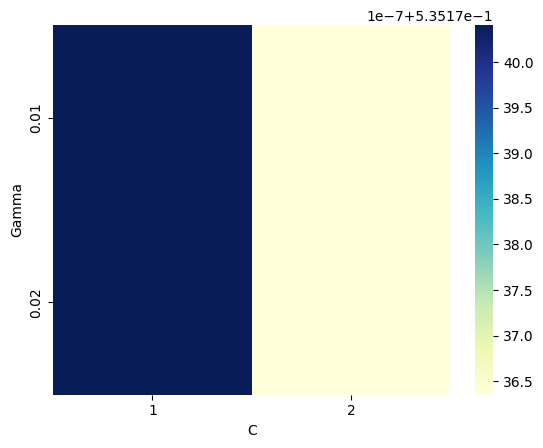

In [ ]:
if grid_p == 'grid':
    gridScores = Clf.cv_results_

    gridScoresList = []

    for i in range(0, len(gridScores['params'])):

        Score = (gridScores['mean_test_score'][i],)
        C = (gridScores['params'][i]['C'],)
        Gamma = (gridScores['params'][i]['gamma'],)

        Tuple = Score + C + Gamma
        gridScoresList.append(Tuple)
        
    df = pd.DataFrame(gridScoresList, columns = ['Validation Score', 'C', 'Gamma'])

    grid_map = df.pivot(index = 'Gamma', columns='C', values= 'Validation Score')

    sns.heatmap(grid_map, cmap = "YlGnBu")